# 2019년 6월, 7월 대중교통 데이터 활용

## 2019년 6월, 7월 대중교통 데이터 전처리

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

# 문자열로 인식되는 수를 다시 수로 바꿔줌
def str_to_int(str):
    str = str.replace(',','')
    return int(str)

sub06 = pd.read_csv('201906subway.csv')
sub06 = sub06.iloc[:, :6] # 마지막 열 필요 없음
sub06.columns = ['Month', 'Line', 'ID', 'Station', 'IN', 'OUT'] # Column 설정
sub06['Station'] = sub06['Station'].str.split('(', n=1, expand=True) # 부역명 제거
sub06k = sub06[sub06['Line'].str.contains('경원선') & \
      sub06['Station'].isin(['이촌', '서빙고', '한남', '옥수', '응봉', '왕십리', '청량리'])]
sub06 = sub06.drop(sub06[sub06['Line'].str.contains('경원선') & \
      sub06['Station'].isin(['이촌', '서빙고', '한남', '옥수', '응봉', '왕십리', '청량리'])].index)
sub06k['Line'] = '경의중앙선'
sub06 = pd.concat([sub06, sub06k], axis=0).sort_values(by='ID', ascending=True, axis=0)
sub06['Line'] = sub06['Line'].replace('공항철도 1호선', '공항철도') # 노선명 간소화
sub06['Line'] = sub06['Line'].replace('경부선', '1호선')
sub06['Line'] = sub06['Line'].replace('경인선', '1호선')
sub06['Line'] = sub06['Line'].replace('장항선', '1호선')
sub06['Line'] = sub06['Line'].replace('경의선', '경의중앙선')
sub06['Line'] = sub06['Line'].replace('중앙선', '경의중앙선')
sub06['Line'] = sub06['Line'].replace('일산선', '3호선')
sub06['Line'] = sub06['Line'].replace('과천선', '4호선')
sub06['Line'] = sub06['Line'].replace('안산선', '4호선')
sub06['Line'] = sub06['Line'].replace('9호선2~3단계', '9호선')
sub06['ALL'] = sub06.apply (lambda row: str_to_int(row.IN) + str_to_int(row.OUT), axis=1) # 승하차 합
sub06['Average'] = sub06.apply (lambda row: round(row.ALL / 30), axis=1) # 일평균 승하차
# sub06 = sub06.sort_values(by='Average', ascending=False, axis=0) # 일평균 승하차 정렬
sub06 = sub06.drop(sub06[sub06['Average'] < 10].index) # 무의미한 데이터 날리기
sub06[['Month', 'Line', 'Station', 'Average']]

,Month,Line,Station,Average
0,2019-06,1호선,서울역,109572
1,2019-06,1호선,시청,50712
2,2019-06,1호선,종각,81693
3,2019-06,1호선,종로3가,65823
4,2019-06,1호선,종로5가,52583
5,2019-06,1호선,동대문,31819
6,2019-06,1호선,신설동,31346
7,2019-06,1호선,제기동,41114
8,2019-06,1호선,청량리,51076
9,2019-06,1호선,동묘앞,23327


In [3]:
sub07 = pd.read_csv('201907subway.csv')
sub07 = sub07.iloc[:, :6] # 마지막 열 필요 없음
sub07.columns = ['Month', 'Line', 'ID', 'Station', 'IN', 'OUT']
sub07['Station'] = sub07['Station'].str.split('(', n=1, expand=True)
sub07k = sub07[sub07['Line'].str.contains('경원선') & \
      sub07['Station'].isin(['이촌', '서빙고', '한남', '옥수', '응봉', '왕십리', '청량리'])]
sub07 = sub07.drop(sub07[sub07['Line'].str.contains('경원선') & \
      sub07['Station'].isin(['이촌', '서빙고', '한남', '옥수', '응봉', '왕십리', '청량리'])].index)
sub07k['Line'] = '경의중앙선'
sub07 = pd.concat([sub07, sub07k], axis=0).sort_values(by='ID', ascending=True, axis=0)
sub07['Line'] = sub07['Line'].replace('공항철도 1호선', '공항철도') 
sub07['Line'] = sub07['Line'].replace('경부선', '1호선')
sub07['Line'] = sub07['Line'].replace('경인선', '1호선')
sub07['Line'] = sub07['Line'].replace('장항선', '1호선')
sub07['Line'] = sub07['Line'].replace('경의선', '경의중앙선')
sub07['Line'] = sub07['Line'].replace('중앙선', '경의중앙선')
sub07['Line'] = sub07['Line'].replace('일산선', '3호선')
sub07['Line'] = sub07['Line'].replace('과천선', '4호선')
sub07['Line'] = sub07['Line'].replace('안산선', '4호선')
sub07['Line'] = sub07['Line'].replace('9호선2~3단계', '9호선')
sub07['ALL'] = sub07.apply (lambda row: str_to_int(row.IN) + str_to_int(row.OUT), axis=1)
sub07['Average'] = sub07.apply (lambda row: round(row.ALL / 31), axis=1)
# sub07 = sub07.sort_values(by='Average', ascending=False, axis=0)
sub07 = sub07.drop(sub07[sub07['Average'] < 10].index) # 무의미한 데이터 날리기
sub07[['Month', 'Line', 'Station', 'Average']]

,Month,Line,Station,Average
0,2019-07,1호선,서울역,109126
1,2019-07,1호선,시청,50914
2,2019-07,1호선,종각,87323
3,2019-07,1호선,종로3가,66976
4,2019-07,1호선,종로5가,51925
5,2019-07,1호선,동대문,30212
6,2019-07,1호선,신설동,31710
7,2019-07,1호선,제기동,39894
8,2019-07,1호선,청량리,48966
9,2019-07,1호선,동묘앞,20382


## 2019년 7월 기준, 각 노선별 이용객이 가장 많은 역 찾기

일반적으로 도심지에 위치한 역이 많은 이용자 수를 보인다.

일부 역은 환승역으로, 지하철끼리의 환승은 계산되지 않아 왜곡이 발생한다.

In [4]:
line_df = []
for value in [str(i+1) + '호선' for i in range(9)] + \
['경의중앙선', '분당선', '수인선', '경춘선', '경강선', '공항철도', '우이신설선']:
    line_df.append([value, \
                    sub07[sub07['Line'] == value]\
                    .sort_values(by='Average', ascending=False, axis=0).iloc[0]['Station'], \
                     sub07[sub07['Line'] == value]\
                    .sort_values(by='Average', ascending=False, axis=0).iloc[0]['Average']])
df = pd.DataFrame(line_df)
df.columns = ['Line', 'Station', 'Average']
df

,Line,Station,Average
0,1호선,서울역,109126
1,2호선,강남,219111
2,3호선,고속터미널,117541
3,4호선,혜화,83242
4,5호선,광화문,71804
5,6호선,공덕,36868
6,7호선,가산디지털단지,82282
7,8호선,문정,39454
8,9호선,신논현,69806
9,경의중앙선,회기,54325


## 2019년 7월 기준, 각 노선별 이용객이 가장 적은 역 찾기

일부 역은 환승역으로, 지하철끼리의 환승은 계산되지 않아 왜곡이 발생한다.

In [5]:
line_df2 = []
for value in [str(i+1) + '호선' for i in range(9)] + \
['경의중앙선', '분당선', '수인선', '경춘선', '경강선', '공항철도', '우이신설선']: # list of list
    line_df2.append([value, \
                    sub07[sub07['Line'] == value].sort_values(by='Average', ascending=False, axis=0).iloc[-1]['Station'], \
                     sub07[sub07['Line'] == value].sort_values(by='Average', ascending=False, axis=0).iloc[-1]['Average']])
df2 = pd.DataFrame(line_df2)
df2.columns = ['Line', 'Station', 'Average']
df2

,Line,Station,Average
0,1호선,직산,1905
1,2호선,도림천,2605
2,3호선,지축,2701
3,4호선,남태령,2665
4,5호선,동대문역사문화공원,6266
5,6호선,버티고개,4692
6,7호선,장암,3602
7,8호선,모란,8438
8,9호선,둔촌오륜,1891
9,경의중앙선,옥수,86


## 2019년 6월, 7월 변화율 살펴보기

In [6]:
# 재정렬
sub06 = sub06.sort_values(by='ID', ascending=True, axis=0)
sub07 = sub07.sort_values(by='ID', ascending=True, axis=0)

# 병합
suball = pd.concat([sub06[['Line', 'ID', 'Station', 'Average']], sub07[['Average']]], axis=1)
suball.columns = ['Line', 'ID', 'Station', 'June', 'July']
suball['Comparison'] = suball.apply (lambda row: row.July - row.June, axis=1)
suball = suball.sort_values(by='Comparison', ascending=False, axis=0)
suball.head()

,Line,ID,Station,June,July,Comparison
548,9호선,4118.0,노들,8615.0,59330.0,50715.0
556,공항철도,4201.0,서울역,26038.0,69806.0,43768.0
398,5호선,2535.0,종로3가,31651.0,71804.0,40153.0
386,5호선,2523.0,양평,12628.0,50642.0,38014.0
383,5호선,2520.0,신정,22200.0,59177.0,36977.0


# 환승역을 묶어서 처리하는 새로운 데이터 프레임

## 2019년 7월 기준, 환승역 자동 합산 통계 만들기

같은 역이라면 노선별로 따로 표시하는 것이 아니라,

하나의 항목으로 만들고, 노선명들은 리스트로 만든다.

In [74]:
def f(x):
    line_list = []
    for value in list(x['Line']):
        if not value.strip() in line_list: # 중복 방지
            line_list.append(value.strip())
    df = pd.Series(dict(Lines = line_list, Linecount = len(line_list), Average = x['Average'].sum()))
    return df
subtemp = sub07.groupby('Station').apply(f).sort_values(by='Average', ascending=False, axis=0)
subtemp

,Lines,Linecount,Average
Station,,,
강남,[2호선],1,219111
잠실,"[2호선, 8호선]",2,205044
홍대입구,"[2호선, 경의중앙선, 공항철도]",3,194396
고속터미널,"[3호선, 7호선, 9호선]",3,191890
서울역,"[1호선, 4호선, 경의중앙선, 공항철도]",4,188068
사당,"[2호선, 4호선]",2,145668
신림,[2호선],1,139667
선릉,"[2호선, 분당선]",2,139128
삼성,[2호선],1,130812


In [66]:
subtemp[subtemp.Linecount>1].head() # 환승역 기준 상위 5개

,Lines,Linecount,Average
Station,,,
잠실,"[2호선, 8호선]",2,205044
홍대입구,"[2호선, 경의중앙선, 공항철도]",3,194396
고속터미널,"[3호선, 7호선, 9호선]",3,191890
서울역,"[1호선, 4호선, 경의중앙선, 공항철도]",4,188068
사당,"[2호선, 4호선]",2,145668


In [51]:
subtemp[subtemp.Linecount>2] # 3개 이상 환승역

,Lines,Linecount,Average
Station,,,
홍대입구,"[2호선, 경의중앙선, 공항철도]",3,194396
고속터미널,"[3호선, 7호선, 9호선]",3,191890
서울역,"[1호선, 4호선, 경의중앙선, 공항철도]",4,188068
종로3가,"[1호선, 3호선, 5호선]",3,124376
동대문역사문화공원,"[2호선, 4호선, 5호선]",3,89535
왕십리,"[2호선, 경의중앙선, 5호선]",3,82340
공덕,"[경의중앙선, 5호선, 6호선, 공항철도]",4,79325
디지털미디어시티,"[경의중앙선, 6호선, 공항철도]",3,56202
김포공항,"[5호선, 9호선, 공항철도]",3,55700


## 데이터 시각화하기

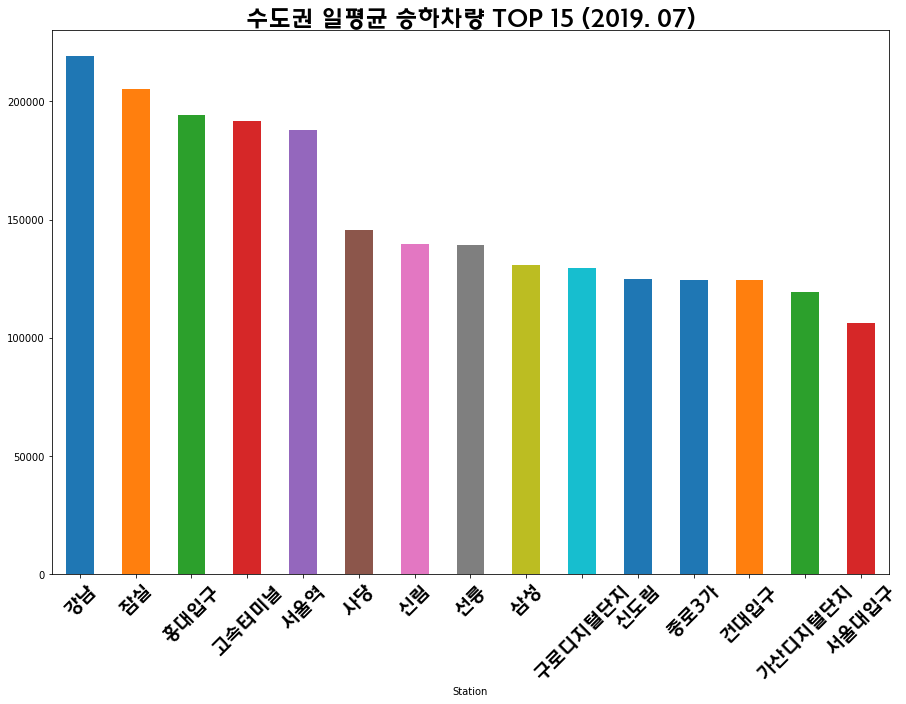

In [16]:
path_gothic = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=25)
fontprop2 = fm.FontProperties(fname=path_gothic, size=20)

subtemp['Average'][:15].plot.bar(figsize=(15, 10))
plt.title('수도권 일평균 승하차량 TOP 15 (2019. 07)', fontproperties=fontprop1)
plt.xticks(rotation=45, fontproperties=fontprop2)
plt.savefig('subway1.png', dpi=400, bbox_inches='tight')
plt.show()

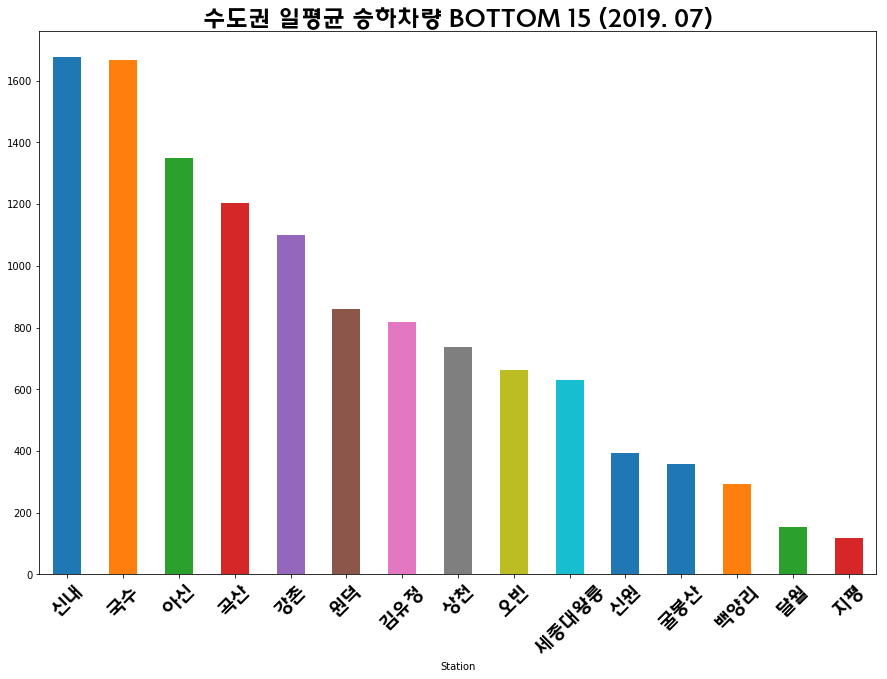

In [17]:
path_gothic = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=25)
fontprop2 = fm.FontProperties(fname=path_gothic, size=20)

subtemp['Average'][-15:].plot.bar(figsize=(15, 10))
plt.title('수도권 일평균 승하차량 BOTTOM 15 (2019. 07)', fontproperties=fontprop1)
plt.xticks(rotation=45, fontproperties=fontprop2)
plt.savefig('subway2.png', dpi=400, bbox_inches='tight')
plt.show()

## 노선 검색 기능 만들기

In [151]:
def find_from_list(list, text):
    for value in list:
        if value == text:
            return 1
    return 0

line_names = [str(i+1) + '호선' for i in range(9)] + \
['경의중앙선', '분당선', '수인선', '경춘선', '경강선', '공항철도', '우이신설선']

keyword = input('노선명을 입력하세요. \n' + str(line_names) + '\n 중에서 선택하세요. \n').strip()
if keyword not in line_names:
    keyword = '2호선'
    print('검색명이 적절하지 않아 2호선이 자동으로 검색됩니다.')
subtemp['Condition'] = subtemp['Lines'].apply(lambda row: find_from_list(row, keyword))

subsearch1 = subtemp[subtemp['Condition'] == 1] # 환승역, 비환승역
subsearch2 = subsearch1[subsearch1['Linecount'] > 1] # 환승역만
subsearch3 = subsearch1[subsearch1['Linecount'] == 1] # 비환승역만

노선명을 입력하세요. 
['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경의중앙선', '분당선', '수인선', '경춘선', '경강선', '공항철도', '우이신설선']
 중에서 선택하세요. 
분당선


## 노선 검색 결과 시각화

### 환승역, 비환승역

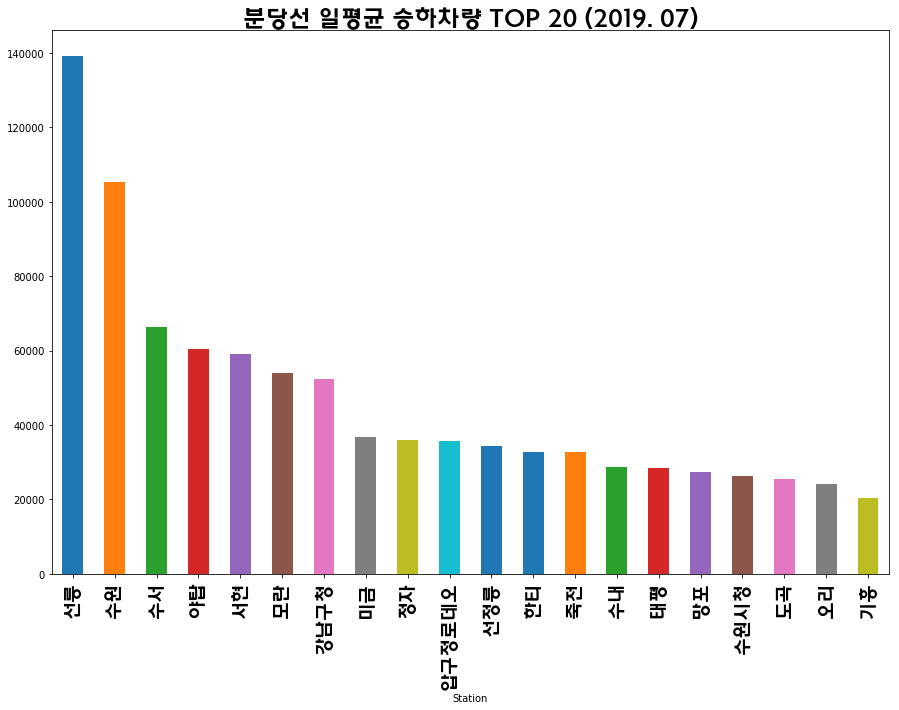

In [152]:
path_gothic = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=25)
fontprop2 = fm.FontProperties(fname=path_gothic, size=20)

subsearch1['Average'][:20].plot.bar(figsize=(15, 10))
plt.title(keyword + ' 일평균 승하차량 TOP 20 (2019. 07)', fontproperties=fontprop1)
plt.xticks(rotation=90, fontproperties=fontprop2)
plt.savefig('subway3.png', dpi=400, bbox_inches='tight')
plt.show()

### 환승역

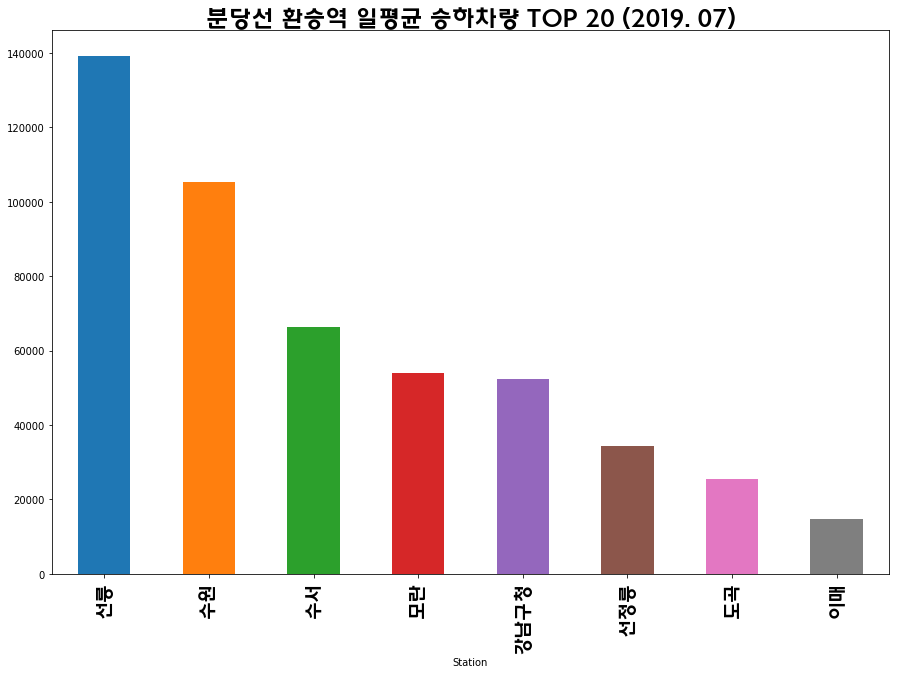

In [153]:
path_gothic = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=25)
fontprop2 = fm.FontProperties(fname=path_gothic, size=20)

subsearch2['Average'][:20].plot.bar(figsize=(15, 10))
plt.title(keyword + ' 환승역 일평균 승하차량 TOP 20 (2019. 07)', fontproperties=fontprop1)
plt.xticks(rotation=90, fontproperties=fontprop2)
plt.savefig('subway4.png', dpi=400, bbox_inches='tight')
plt.show()

### 비환승역

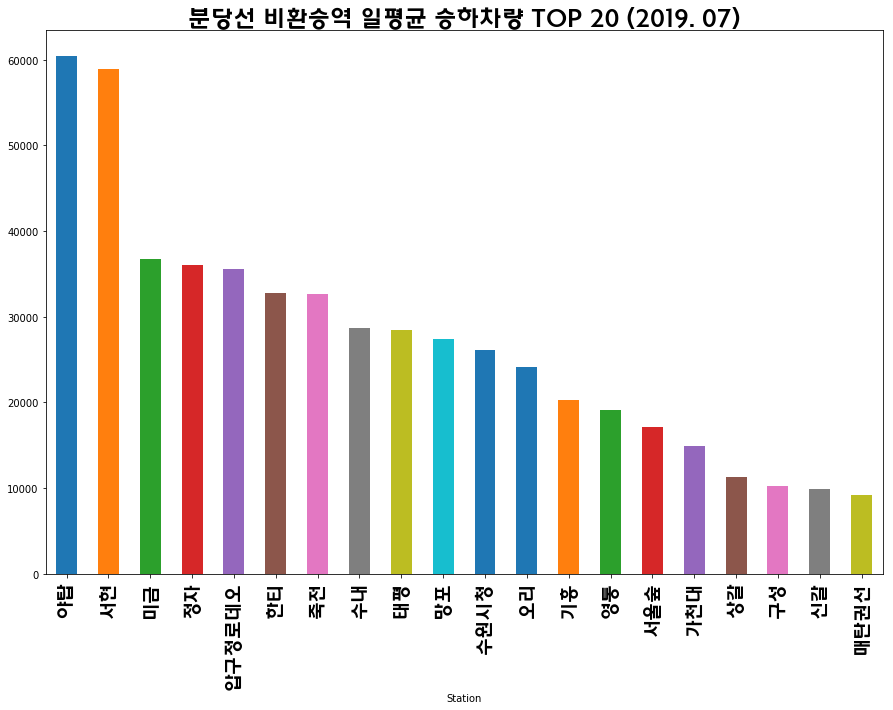

In [154]:
path_gothic = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic, size=25)
fontprop2 = fm.FontProperties(fname=path_gothic, size=20)

subsearch3['Average'][:20].plot.bar(figsize=(15, 10))
plt.title(keyword + ' 비환승역 일평균 승하차량 TOP 20 (2019. 07)', fontproperties=fontprop1)
plt.xticks(rotation=90, fontproperties=fontprop2)
plt.savefig('subway5.png', dpi=400, bbox_inches='tight')
plt.show()

to do list

데이터 시각화

환승역 정보를 기반으로 길찾기를 만들 수 있을까?

유무임 승차 비율 데이터 활용

시간대별 쏠림 그래프 만들기